# Day 09. Exercise 00
# Regularization

## 0. Imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import joblib

## 1. Preprocessing

1. Read the file `dayofweek.csv` that you used in the previous day to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [6]:
df = pd.read_csv('../data/dayofweek.csv', index_col=0)
df.head()

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2, stratify=y)

## 2. Logreg regularization

### a. Default regularization

1. Train a baseline model with the only parameters `random_state=21`, `fit_intercept=False`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model


The result of the code where you trained and evaluated the baseline model should be exactly like this (use `%%time` to get the info about how long it took to run the cell):

```
train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
```

In [8]:
lr = LogisticRegression(random_state=21, fit_intercept=False)

In [9]:
# StratifiedKFold учитывает распределение целевой переменной y. Он гарантирует, что в каждом фолде соотношение классов будет таким же, как и в исходном наборе данных.
# Например, если в исходных данных 70% объектов принадлежат классу 0 и 30% — классу 1, то в каждом фолде это соотношение (70/30) сохранится.

def crossval(model, X, y, n_splits=10):
    train_scores = []
    valid_scores = []
    skf = StratifiedKFold(n_splits=10)
    for train, valid in skf.split(X, y):
        X_train, X_valid = X.iloc[train], X.iloc[valid]
        y_train, y_valid = y.iloc[train], y.iloc[valid]
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_valid_pred = model.predict(X_valid)
        train_scores.append(accuracy_score(y_train, y_train_pred))
        valid_scores.append(accuracy_score(y_valid, y_valid_pred))

    for i in range(len(train_scores)):
        print(f'train - {train_scores[i]:.5f} | valid - {valid_scores[i]:.5f}')
        
    print(f'Average accuracy on crossval is {np.mean(valid_scores):.5f}')
    print(f'Std is {np.std(valid_scores):.5f}')


In [10]:
%%time
crossval(lr, X_train, y_train)

train - 0.62902 | valid - 0.59259
train - 0.64633 | valid - 0.62963
train - 0.63479 | valid - 0.56296
train - 0.65622 | valid - 0.61481
train - 0.63397 | valid - 0.57778
train - 0.64056 | valid - 0.59259
train - 0.64138 | valid - 0.65926
train - 0.65952 | valid - 0.56296
train - 0.64333 | valid - 0.59701
train - 0.63674 | valid - 0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
CPU times: user 1.56 s, sys: 5.59 s, total: 7.14 s
Wall time: 1.17 s


### b. Optimizing regularization parameters

1. In the cells below try different values of penalty: `none`, `l1`, `l2` – you can change the values of solver too.

In [11]:
%%time
lr = LogisticRegression(penalty='none', max_iter=1000, random_state=21, fit_intercept=False)
crossval(lr, X_train, y_train)

train - 0.66694 | valid - 0.63704
train - 0.65787 | valid - 0.65926
train - 0.66694 | valid - 0.57778
train - 0.66529 | valid - 0.62963
train - 0.66694 | valid - 0.62222
train - 0.65952 | valid - 0.57778
train - 0.64963 | valid - 0.69630
train - 0.68425 | valid - 0.61481
train - 0.66474 | valid - 0.62687
train - 0.65651 | valid - 0.60448
Average accuracy on crossval is 0.62462
Std is 0.03379
CPU times: user 6.43 s, sys: 21.9 s, total: 28.4 s
Wall time: 4.04 s


In [12]:
%%time
lr = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear', penalty='l1')
crossval(lr, X_train, y_train)

train - 0.61830 | valid - 0.54815
train - 0.62737 | valid - 0.62222
train - 0.60511 | valid - 0.54074
train - 0.63644 | valid - 0.62222
train - 0.62407 | valid - 0.55556
train - 0.62325 | valid - 0.58519
train - 0.61253 | valid - 0.63704
train - 0.64716 | valid - 0.58519
train - 0.63015 | valid - 0.59701
train - 0.61367 | valid - 0.59701
Average accuracy on crossval is 0.58903
Std is 0.03129
CPU times: user 453 ms, sys: 1.82 s, total: 2.27 s
Wall time: 358 ms


In [13]:
%%time
lr = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear', penalty='l2')
crossval(lr, X_train, y_train)

train - 0.61006 | valid - 0.56296
train - 0.61665 | valid - 0.61481
train - 0.61336 | valid - 0.59259
train - 0.62902 | valid - 0.60741
train - 0.60923 | valid - 0.55556
train - 0.61500 | valid - 0.57778
train - 0.61665 | valid - 0.61481
train - 0.64056 | valid - 0.53333
train - 0.62109 | valid - 0.58209
train - 0.61120 | valid - 0.57463
Average accuracy on crossval is 0.58160
Std is 0.02532
CPU times: user 248 ms, sys: 830 ms, total: 1.08 s
Wall time: 155 ms


## 3. SVM regularization

### a. Default regularization

1. Train a baseline model with the only parameters `probability=True`, `kernel='linear'`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [14]:
svm = SVC(random_state=21, probability=True, kernel='linear')

In [15]:
%%time
crossval(svm, X_train, y_train)

train - 0.70486 | valid - 0.65926
train - 0.69662 | valid - 0.75556
train - 0.69415 | valid - 0.62222
train - 0.70239 | valid - 0.65185
train - 0.69085 | valid - 0.65185
train - 0.68920 | valid - 0.64444
train - 0.69250 | valid - 0.72593
train - 0.70074 | valid - 0.62222
train - 0.69605 | valid - 0.61940
train - 0.71087 | valid - 0.63433
Average accuracy on crossval is 0.65871
Std is 0.04359
CPU times: user 4.01 s, sys: 492 ms, total: 4.5 s
Wall time: 3.98 s


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `C`.

In [16]:
%%time
svm = SVC(random_state=21, probability=True, kernel='linear', C=1)
crossval(svm, X_train, y_train)

train - 0.70486 | valid - 0.65926
train - 0.69662 | valid - 0.75556
train - 0.69415 | valid - 0.62222
train - 0.70239 | valid - 0.65185
train - 0.69085 | valid - 0.65185
train - 0.68920 | valid - 0.64444
train - 0.69250 | valid - 0.72593
train - 0.70074 | valid - 0.62222
train - 0.69605 | valid - 0.61940
train - 0.71087 | valid - 0.63433
Average accuracy on crossval is 0.65871
Std is 0.04359
CPU times: user 4.35 s, sys: 0 ns, total: 4.35 s
Wall time: 4.35 s


In [17]:
%%time
svm = SVC(random_state=21, probability=True, kernel='linear', C=2)
crossval(svm, X_train, y_train)

train - 0.70734 | valid - 0.65926
train - 0.71393 | valid - 0.75556
train - 0.74526 | valid - 0.63704
train - 0.71558 | valid - 0.66667
train - 0.71146 | valid - 0.67407
train - 0.70157 | valid - 0.63704
train - 0.70651 | valid - 0.71852
train - 0.70981 | valid - 0.64444
train - 0.72405 | valid - 0.64925
train - 0.72488 | valid - 0.64179
Average accuracy on crossval is 0.66836
Std is 0.03721
CPU times: user 4.06 s, sys: 0 ns, total: 4.06 s
Wall time: 4.06 s


In [18]:
%%time
svm = SVC(random_state=21, probability=True, kernel='linear', C=4)
crossval(svm, X_train, y_train)

train - 0.71723 | valid - 0.65185
train - 0.75598 | valid - 0.82222
train - 0.77741 | valid - 0.67407
train - 0.73619 | valid - 0.66667
train - 0.72218 | valid - 0.71111
train - 0.72960 | valid - 0.69630
train - 0.72383 | valid - 0.71852
train - 0.74444 | valid - 0.63704
train - 0.75371 | valid - 0.67164
train - 0.75700 | valid - 0.68657
Average accuracy on crossval is 0.69360
Std is 0.04905
CPU times: user 4.24 s, sys: 0 ns, total: 4.24 s
Wall time: 4.24 s


## 4. Tree

### a. Default regularization

1. Train a baseline model with the only parameter `max_depth=10` and `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [19]:
tree = DecisionTreeClassifier(random_state=21, max_depth=10)

In [20]:
%%time
crossval(tree, X_train, y_train)

train - 0.81039 | valid - 0.74074
train - 0.77741 | valid - 0.74074
train - 0.83347 | valid - 0.70370
train - 0.79720 | valid - 0.76296
train - 0.82440 | valid - 0.75556
train - 0.80379 | valid - 0.68889
train - 0.80709 | valid - 0.76296
train - 0.80132 | valid - 0.65926
train - 0.80807 | valid - 0.75373
train - 0.80478 | valid - 0.68657
Average accuracy on crossval is 0.72551
Std is 0.03562
CPU times: user 69.7 ms, sys: 0 ns, total: 69.7 ms
Wall time: 69.3 ms


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `max_depth`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [21]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=10)
crossval(tree, X_train, y_train)

train - 0.81039 | valid - 0.74074
train - 0.77741 | valid - 0.74074
train - 0.83347 | valid - 0.70370
train - 0.79720 | valid - 0.76296
train - 0.82440 | valid - 0.75556
train - 0.80379 | valid - 0.68889
train - 0.80709 | valid - 0.76296
train - 0.80132 | valid - 0.65926
train - 0.80807 | valid - 0.75373
train - 0.80478 | valid - 0.68657
Average accuracy on crossval is 0.72551
Std is 0.03562
CPU times: user 75.5 ms, sys: 0 ns, total: 75.5 ms
Wall time: 74.9 ms


In [22]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=20)
crossval(tree, X_train, y_train)

train - 0.98846 | valid - 0.86667
train - 0.99011 | valid - 0.91111
train - 0.98681 | valid - 0.85926
train - 0.98763 | valid - 0.91111
train - 0.98928 | valid - 0.88148
train - 0.98186 | valid - 0.85926
train - 0.98846 | valid - 0.91852
train - 0.99176 | valid - 0.89630
train - 0.99094 | valid - 0.88060
train - 0.98847 | valid - 0.88060
Average accuracy on crossval is 0.88649
Std is 0.02075
CPU times: user 81.6 ms, sys: 0 ns, total: 81.6 ms
Wall time: 80.7 ms


In [23]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=40)
crossval(tree, X_train, y_train)

train - 1.00000 | valid - 0.85926
train - 1.00000 | valid - 0.91852
train - 1.00000 | valid - 0.86667
train - 1.00000 | valid - 0.91111
train - 1.00000 | valid - 0.88148
train - 1.00000 | valid - 0.85185
train - 1.00000 | valid - 0.92593
train - 1.00000 | valid - 0.88148
train - 1.00000 | valid - 0.88060
train - 1.00000 | valid - 0.88060
Average accuracy on crossval is 0.88575
Std is 0.02374
CPU times: user 76.5 ms, sys: 0 ns, total: 76.5 ms
Wall time: 75.9 ms


In [24]:
params = {
    'criterion': ['gini', 'entropy'],
    "max_depth": range(10, 40),
    'min_samples_split': range(2, 4),
    'min_samples_leaf': range(1, 4),
}

tree = DecisionTreeClassifier(random_state=21)
gs = GridSearchCV(estimator=tree, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
print(f'Best params: {gs.best_params_}')
print(f'Best score: {gs.best_score_}')

Best params: {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8686658405617512


In [25]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=21, min_samples_split=2, min_samples_leaf=1)
crossval(tree, X_train, y_train)

train - 0.99176 | valid - 0.86667
train - 0.99176 | valid - 0.90370
train - 0.99093 | valid - 0.85926
train - 0.99176 | valid - 0.89630
train - 0.99093 | valid - 0.88148
train - 0.98516 | valid - 0.88148
train - 0.98928 | valid - 0.91852
train - 0.99423 | valid - 0.87407
train - 0.99588 | valid - 0.86567
train - 0.99012 | valid - 0.88060
Average accuracy on crossval is 0.88278
Std is 0.01757
CPU times: user 74.5 ms, sys: 500 µs, total: 75 ms
Wall time: 74.1 ms


## 5. Random forest

### a. Default regularization

1. Train a baseline model with the only parameters `n_estimators=50`, `max_depth=14`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [26]:
forest = RandomForestClassifier(random_state=21, n_estimators=50, max_depth=14)

In [27]:
%%time
crossval(forest, X_train, y_train)

train - 0.96455 | valid - 0.88148
train - 0.96208 | valid - 0.91852
train - 0.96785 | valid - 0.86667
train - 0.96455 | valid - 0.89630
train - 0.96538 | valid - 0.91111
train - 0.96538 | valid - 0.88148
train - 0.97115 | valid - 0.91852
train - 0.96867 | valid - 0.85185
train - 0.97364 | valid - 0.88060
train - 0.97941 | valid - 0.86567
Average accuracy on crossval is 0.88722
Std is 0.02204
CPU times: user 815 ms, sys: 2 ms, total: 817 ms
Wall time: 817 ms


### b. Optimizing regularization parameters

1. In the new cells try different values of the parameters `max_depth` and `n_estimators`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [28]:
%%time
forest = RandomForestClassifier(random_state=21, n_estimators=100, max_depth=14)
crossval(forest, X_train, y_train)

train - 0.96950 | valid - 0.87407
train - 0.96867 | valid - 0.91111
train - 0.97197 | valid - 0.87407
train - 0.96867 | valid - 0.89630
train - 0.96867 | valid - 0.90370
train - 0.96702 | valid - 0.85926
train - 0.97444 | valid - 0.91111
train - 0.96950 | valid - 0.88148
train - 0.97117 | valid - 0.88060
train - 0.97199 | valid - 0.86567
Average accuracy on crossval is 0.88574
Std is 0.01773
CPU times: user 1.55 s, sys: 4.41 ms, total: 1.55 s
Wall time: 1.55 s


In [29]:
%%time
forest = RandomForestClassifier(random_state=21, n_estimators=100, max_depth=30)
crossval(forest, X_train, y_train)

train - 1.00000 | valid - 0.90370
train - 1.00000 | valid - 0.94074
train - 1.00000 | valid - 0.91852
train - 1.00000 | valid - 0.92593
train - 1.00000 | valid - 0.91111
train - 1.00000 | valid - 0.90370
train - 0.99918 | valid - 0.92593
train - 0.99918 | valid - 0.90370
train - 1.00000 | valid - 0.91045
train - 1.00000 | valid - 0.90299
Average accuracy on crossval is 0.91468
Std is 0.01215
CPU times: user 1.74 s, sys: 1.62 ms, total: 1.75 s
Wall time: 1.75 s


In [30]:
params = {
    'n_estimators': range(100, 250, 30),
    'max_depth': range(20, 40, 5),
    'min_samples_split': range(2, 4),
    'min_samples_leaf': range(1, 4),
}
gs = GridSearchCV(estimator=RandomForestClassifier(random_state=21), param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
print(f'Best params: {gs.best_params_}')
print(f'Best score: {gs.best_score_}')

Best params: {'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 190}
Best score: 0.9028060030290513


In [31]:
%%time
forest = RandomForestClassifier(random_state=21, n_estimators=190, max_depth=35)
crossval(forest, X_train, y_train)

train - 1.00000 | valid - 0.89630
train - 1.00000 | valid - 0.94815
train - 1.00000 | valid - 0.90370
train - 1.00000 | valid - 0.93333
train - 1.00000 | valid - 0.91111
train - 1.00000 | valid - 0.88148
train - 1.00000 | valid - 0.92593
train - 1.00000 | valid - 0.88889
train - 1.00000 | valid - 0.92537
train - 1.00000 | valid - 0.90299
Average accuracy on crossval is 0.91172
Std is 0.01999
CPU times: user 3.36 s, sys: 6.5 ms, total: 3.36 s
Wall time: 3.36 s


## 6. Predictions

1. Choose the best model and use it to make predictions for the test dataset.
2. Calculate the final accuracy.
3. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your test dataset).
4. Save the model.

In [32]:
forest = RandomForestClassifier(random_state=21, n_estimators=190, max_depth=35)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.9378698224852071

In [65]:
report = classification_report(y_test, y_pred, labels=range(0, 7))
print(report)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       1.00      0.95      0.97        55
           2       1.00      0.93      0.97        30
           3       0.92      0.97      0.95        80
           4       0.90      0.86      0.88        21
           5       0.89      0.94      0.92        54
           6       0.93      0.99      0.96        71

    accuracy                           0.94       338
   macro avg       0.94      0.91      0.92       338
weighted avg       0.94      0.94      0.94       338



In [37]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[20,  0,  0,  1,  1,  1,  4],
       [ 0, 52,  0,  2,  0,  1,  0],
       [ 0,  0, 28,  2,  0,  0,  0],
       [ 1,  0,  0, 78,  0,  1,  0],
       [ 0,  0,  0,  0, 18,  2,  1],
       [ 0,  0,  0,  2,  1, 51,  0],
       [ 0,  0,  0,  0,  0,  1, 70]])

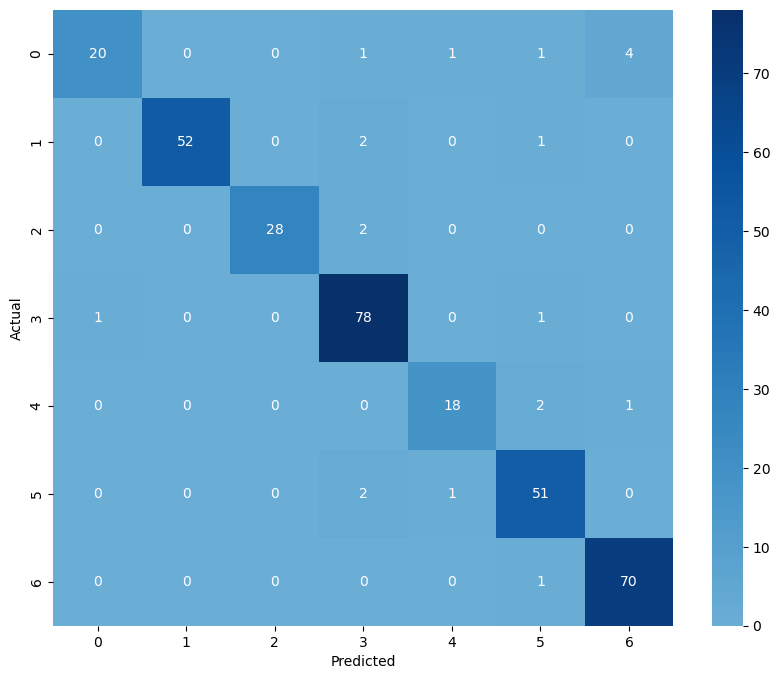

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap="Blues", center=0, cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
joblib.dump(forest, '../data/model.pkl')

['../data/model.plk']